# CNA PREP and RESULTS TISSUE CELLS
## Sid Gurajala
## 05/01/2023

## Libraries 

In [1]:
library(patchwork)
library(purrr)
library(dplyr) 
library(tidyverse) 
library(cowplot)
library(singlecellmethods)
library(ggplot2)
library(ggbeeswarm)
library(stringr)

source("/data/srlab/anathan/scripts/scseq_utils.R")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


The following object is masked from ‘package:patchwork’:

    align_plots


Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    

In [2]:
labelfontsize = 20
tickfontsize = 16

figdir = '../../figures/components/'

In [3]:
source("/data/srlab/ssg34/SLE_kidney_v2/scripts/libs/kidney_utils_updated.r")

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: viridisLite

Loading required package: Rcpp



In [2]:
source("/data/srlab/ssg34/SLE_kidney_v2/scripts/libs/kidney_utils.r")
clinical <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/cna_new/clinical_data_05042023.rds') %>% 
                        rename(Final_Site = Site) %>% select(-sample)

In [ ]:
#all_meta <- readRDS('/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/20230215_Tissue/meta_Tissue_500nGene_1000nUMI_3pctnontargetMTwdoubletandsampleFINAL-02-22-23.rds')
norm <- readRDS('/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/normalized_data_ScNuc_500nGene_1000nUMI_3pctnontargetMTwdoubletandsampleFINAL-8-10-22.rds')

In [ ]:
rawcounts <- readRDS('/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/2022-08-09_ScNuc_cell_QCed_RawCounts.rds')
mito_genes_subset <- c("MT-ND5", "MT-ND6")
percent_mito <- colSums(rawcounts[mito_genes_subset, ]) / colSums(rawcounts) * 100
percent_mito <- data.frame(cell = names(percent_mito), percent.mt = percent_mito)

In [ ]:
saveRDS(percent_mito, '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/percent_mito_from_rawcounts_12072023.rds')

In [ ]:
percent_mito <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/percent_mito_from_rawcounts_12072023.rds')

In [ ]:
kpmp_markers <- read.csv('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/KPMP_markers.csv')

# INTL

## SUBTYPING

In [8]:
intl_meta <- readRDS('/data/srlab2/qxiao/AMP-SLE/sc_nuc_data/20230215_Tissue/INTL/2023-06-30_meta_500nGene_1000nUMI_3.rds')

In [ ]:
intl_meta <- intl_meta %>% filter(! hres.0.4 %in% c(9, 11))

In [ ]:
intl_meta$hres.0.4[intl_meta$hres.0.4 == 10] <- 9

In [ ]:
final_annotation = data.frame(hres.0.4 = factor(seq(0, 9)),
                                 final_annotation = c("INTL0. Fenestrated EC",
                                                      "INTL1. EC-AVR",
                                                      "INTL2. VSMC/P",
                                                      "INTL3. FIB",
                                                      "INTL4. EC-DVR",
                                                      "INTL5. EC-AEA",
                                                      "INTL6. EC-GLOM",
                                                      "INTL7. Mesangial",
                                                      "INTL8. EC/VSMC-P",
                                                      "INTL9. EC-LYMPH"))
intl_meta <- left_join(intl_meta, final_annotation)
cluster_center <- intl_meta %>%
                  group_by(hres.0.4) %>%
                  summarise_at(vars(huwotUMAP1, huwotUMAP2), funs(median(., na.rm=TRUE)))
cluster_center <- as.data.frame(cluster_center)

In [ ]:
intl_meta <- left_join(intl_meta, percent_mito)

In [ ]:
saveRDS(intl_meta %>% select(-c(Annot.separate, predicted_broad, predicted_fine)),
        '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/intl_meta_qcd_harmony_umap_clusternames_11302023.rds')

In [2]:
intl_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/intl_meta_qcd_harmony_umap_clusternames_11302023.rds')

In [3]:
intl_meta %>% colnames()

[1] "cell"             "sample"           "dataset"          "Site"            
 [5] "Type"             "processing.batch" "nCount_RNA"       "nFeature_RNA"    
 [9] "broad.type"       "doublet_score"    "uwotUMAP1"        "uwotUMAP2"       
[13] "hPC-1"            "hPC-2"            "hPC-3"            "hPC-4"           
[17] "hPC-5"            "hPC-6"            "hPC-7"            "hPC-8"           
[21] "hPC-9"            "hPC-10"           "hPC-11"           "hPC-12"          
[25] "hPC-13"           "hPC-14"           "hPC-15"           "hPC-16"          
[29] "hPC-17"           "hPC-18"           "hPC-19"           "hPC-20"          
[33] "huwotUMAP1"       "huwotUMAP2"       "hres.0.1"         "hres.0.2"        
[37] "hres.0.3"         "hres.0.4"         "hres.0.6"         "hres.0.8"        
[41] "hres.1.2"         "hres.1.6"         "hres.2.0"         "final_annotation"
[45] "percent.mt"

In [ ]:
intl_norm <- norm[, intl_meta$cell]

In [ ]:
saveRDS(intl_norm, '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/INTL_qcd_norm_12072023.rds')

In [28]:
qcd_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/intl_meta_qcd_harmony_umap_clusternames_11302023.rds')
qcd_meta <- qcd_meta %>% rename(new_cluster_number = hres.0.4)

In [29]:
sn_control <- qcd_meta %>% filter(dataset == "snRNAseq", Type == "Control") %>% 
                group_by(new_cluster_number) %>% 
                summarize(samples = length(unique(sample)),
                          ncells = length(unique(cell))) %>% 
                mutate(sn_control = paste0(samples, " (", ncells, ")")) %>% select(new_cluster_number, sn_control)
sn_LN <- qcd_meta %>% filter(dataset == "snRNAseq", Type == "LN") %>% 
                group_by(new_cluster_number) %>% 
                summarize(samples = length(unique(sample)),
                          ncells = length(unique(cell))) %>% 
                mutate(sn_LN = paste0(samples, " (", ncells, ")")) %>% select(new_cluster_number, sn_LN)
sc_control <- qcd_meta %>% filter(dataset == "scRNAseq", Type == "Control") %>% 
                group_by(new_cluster_number) %>% 
                summarize(samples = length(unique(sample)),
                          ncells = length(unique(cell))) %>% 
                mutate(sc_control = paste0(samples, " (", ncells, ")")) %>% select(new_cluster_number, sc_control)
sc_LN <- qcd_meta %>% filter(dataset == "scRNAseq", Type == "LN") %>% 
                group_by(new_cluster_number) %>% 
                summarize(samples = length(unique(sample)),
                          ncells = length(unique(cell))) %>% 
                mutate(sc_LN = paste0(samples, " (", ncells, ")")) %>% select(new_cluster_number, sc_LN)
merged <- sc_LN %>% left_join(sc_control) %>% left_join(sn_LN) %>% left_join(sn_control)
merged[is.na(merged)] <- "0 (0)"
write.csv(merged, '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/INTL_summary_04152024.csv', quote = FALSE, row.names = FALSE)

Joining, by = "new_cluster_number"
Joining, by = "new_cluster_number"
Joining, by = "new_cluster_number"


### Cluster UMAPs

In [4]:
intl_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/intl_meta_qcd_harmony_umap_clusternames_11302023.rds')
intl_norm <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/INTL_qcd_norm_12072023.rds')

In [5]:
qcd_meta = intl_meta
qcd_norm = intl_norm

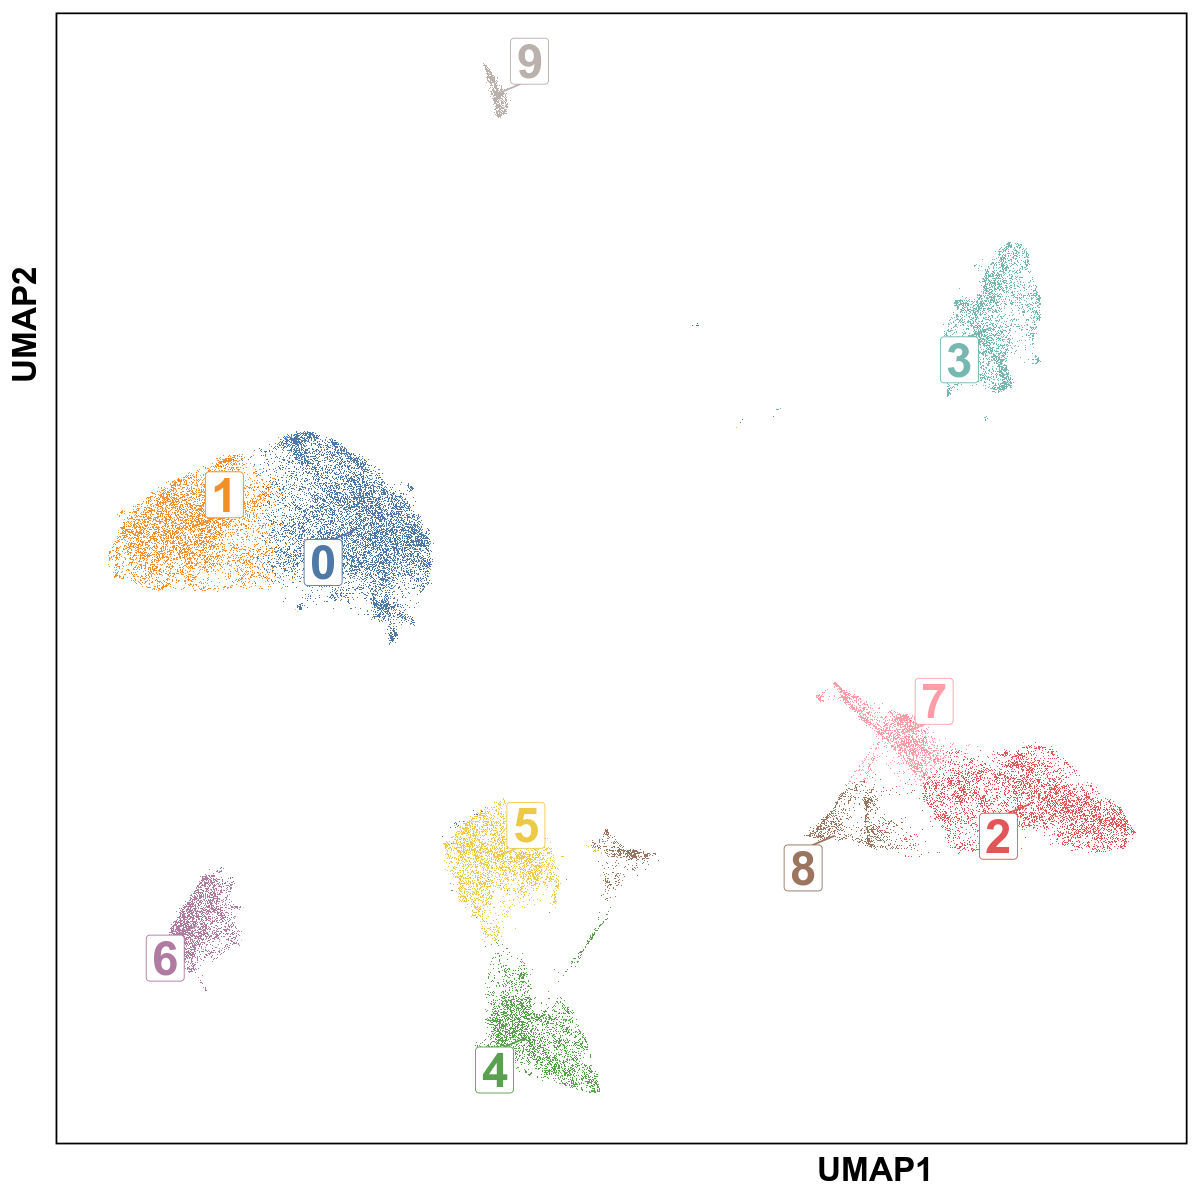

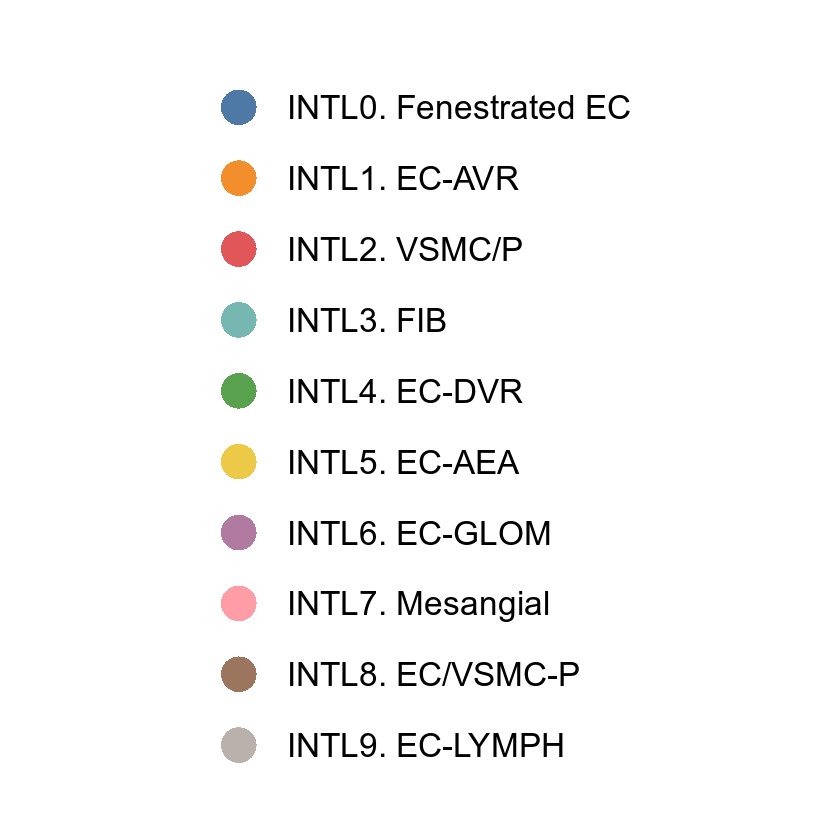

In [10]:
options(warn=-1)
cluster_center <- intl_meta %>%
                  group_by(hres.0.4, final_annotation) %>%
                  summarise_at(vars(huwotUMAP1, huwotUMAP2), funs(median(., na.rm=TRUE)))
cluster_center <- as.data.frame(cluster_center)

options(repr.plot.height = 9, repr.plot.width = 18)
p <- ggplot() +
      geom_point(
        data = intl_meta[sample(nrow(intl_meta)), ] %>% 
          select(huwotUMAP1, huwotUMAP2, hres.0.4, final_annotation) %>% 
                  mutate(final_annotation = factor(final_annotation, 
                                                   levels = cluster_center$final_annotation)),
        aes(x = huwotUMAP1, y = huwotUMAP2, color = final_annotation),
          size = 0.25, shape = 20, stroke = 0.0001) +
      ggrepel::geom_label_repel(
        data = cluster_center,
        aes(x = huwotUMAP1, y = huwotUMAP2, 
            label = hres.0.4 , color = as.factor(final_annotation)),
        size = 10,  fontface = "bold",
        box.padding = unit(0.5, "lines"),
        point.padding = unit(0.01, "lines"),
        show.legend = FALSE
      ) +
    ggthemes::scale_color_tableau()   +
    theme_classic(base_size = 15) +
      theme(
        legend.position = "right",
            #  plot.title = element_text(hjust = 0.5, 
            #                            size = 18, 
            #                            face = "bold"),
              axis.title = element_text(hjust = 0.75, 
                                        size = 20, 
                                        face = "bold"), 
              axis.text = element_blank(),
              axis.line = element_blank(),
              axis.ticks = element_blank(),
              panel.border = element_rect(colour = "black", fill=NA, size=1),
              legend.text = element_text(size = 20),
              legend.title = element_blank()
          
    ) +
    theme(text=element_text(family="Arial")) + 
        labs(x = "UMAP1", y = "UMAP2") +
        guides(color = guide_legend(ncol = 1, override.aes = list(size = 15)))
legend <- cowplot::get_legend(p)
p <- p + theme(legend.position = "none")
legend <- cowplot::plot_grid(legend)
cowplot::save_plot("/data/srlab/ssg34/SLE_kidney_v2/figures/figure2/figure2g.png",
       p,
       base_height = 10,
       base_width = 10)
cowplot::save_plot("/data/srlab/ssg34/SLE_kidney_v2/figures/figure2/figure2g-legend.png",
       legend,
       base_height = 7,
       base_width = 7)
fig.size(10, 10)
p
fig.size(7, 7)
legend
options(warn=0)

### Single Cell UMAP, Single Nuclear UMAP

In [6]:
qcd_meta = qcd_meta %>% rename(hUMAP1 = huwotUMAP1, hUMAP2 = huwotUMAP2)

Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


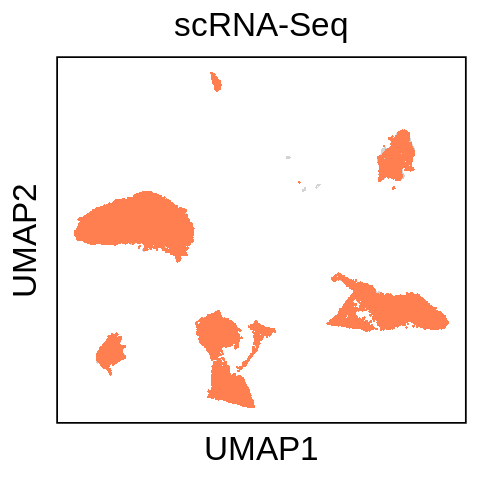

In [7]:
umap_plot = ggplot() +
  geom_point(
    data=select(qcd_meta, c(hUMAP1, hUMAP2, dataset)),
    aes(x = hUMAP1, y = hUMAP2),
    size = 0.75, stroke = 0.0001, color = "lightgrey"
  ) + 
  geom_point(
    data=qcd_meta %>% filter(dataset == "scRNAseq") %>% select(hUMAP1, hUMAP2),
    aes(x = hUMAP1, y = hUMAP2),
    size = 0.75, stroke = 0.0001, color = "coral"
  ) +
theme_classic(base_size = tickfontsize) +
  theme(
    legend.position = "none",
         plot.title = element_text(size = labelfontsize, hjust = 0.5),
          axis.title = element_text(size = labelfontsize), 
          axis.text = element_blank(),
          axis.line = element_blank(),
          axis.ticks = element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=1),
          text=element_text(family="Arial")
  ) + labs(x = "UMAP1", y = "UMAP2", title = 'scRNA-Seq') 


outplot = umap_plot

height = 4
width = 4
fig.size(height, width)
outplot

ggsave(paste0(figdir, 'intl_umap_sc.png'), plot = outplot,  
       height = height, width = width, dpi = 500)
ggsave(paste0(figdir, 'intl_umap_sc.pdf'), plot = outplot,  
       height = height, width = width, dpi = 500, device = cairo_pdf)


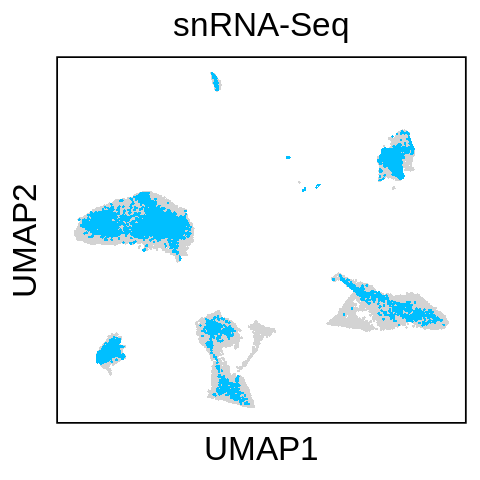

In [8]:
umap_plot = ggplot() +
  geom_point(
    data=select(qcd_meta, c(hUMAP1, hUMAP2, dataset)),
    aes(x = hUMAP1, y = hUMAP2),
    size = 0.75, stroke = 0.0001, color = "lightgrey"
  ) + 
  geom_point(
    data=qcd_meta %>% filter(dataset == "snRNAseq") %>% select(hUMAP1, hUMAP2),
    aes(x = hUMAP1, y = hUMAP2),
    size = 0.75, stroke = 0.0001, color = "deepskyblue"
  ) +
theme_classic(base_size = tickfontsize) +
  theme(
    legend.position = "none",
         plot.title = element_text(size = labelfontsize, hjust = 0.5),
          axis.title = element_text(size = labelfontsize), 
          axis.text = element_blank(),
          axis.line = element_blank(),
          axis.ticks = element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=1),
          text=element_text(family="Arial")
  ) + labs(x = "UMAP1", y = "UMAP2", title = 'snRNA-Seq') 


outplot = umap_plot

height = 4
width = 4
fig.size(height, width)
outplot

ggsave(paste0(figdir, 'intl_umap_sn.png'), plot = outplot,  
       height = height, width = width, dpi = 500)
ggsave(paste0(figdir, 'intl_umap_sn.pdf'), plot = outplot,  
       height = height, width = width, dpi = 500, device = cairo_pdf)

### Marker Gene UMAPs

In [9]:
markers = c('PECAM1', 'COL1A1', 'PLVAP', 'NOTCH3')

In [10]:
qcd_scaled = qcd_norm[markers, ] %>% scaleData
vmax = qcd_scaled %>% quantile(.95)
vmin = qcd_scaled %>% quantile(.05)

In [11]:
p = plot_shuffled_features(qcd_meta, qcd_scaled, markers[1], pt_size = 1, max.cutoff = vmax,
                          min.cutoff = vmin)
p1 = p + theme(legend.text = element_text(size = labelfontsize-2),
                legend.title = element_text(size = labelfontsize),
                plot.title = element_text(hjust = 0.5, size = labelfontsize),
               theme(text=element_text(family="Arial")),
              legend.position = "none") + labs(x = 'UMAP1', y = 'UMAP2')

p = plot_shuffled_features(qcd_meta, qcd_scaled, markers[2], pt_size = 1, max.cutoff = vmax,
                          min.cutoff = vmin)
p2 = p + theme(legend.text = element_text(size = labelfontsize-2),
                legend.title = element_text(size = labelfontsize),
                plot.title = element_text(hjust = 0.5, size = labelfontsize),
               theme(text=element_text(family="Arial")),
              legend.position = "none") + labs(x = 'UMAP1', y = 'UMAP2')

p = plot_shuffled_features(qcd_meta, qcd_scaled, markers[3], pt_size = 1, max.cutoff = vmax,
                          min.cutoff = vmin)
p3 = p + theme(legend.text = element_text(size = labelfontsize-2),
                legend.title = element_text(size = labelfontsize),
                plot.title = element_text(hjust = 0.5, size = labelfontsize),
               theme(text=element_text(family="Arial")),
              legend.position = "none") + labs(x = 'UMAP1', y = 'UMAP2')

p = plot_shuffled_features(qcd_meta, qcd_scaled, markers[4], pt_size = 1, max.cutoff = vmax,
                          min.cutoff = vmin)
p4 = p + theme(legend.text = element_text(size = labelfontsize-2),
                legend.title = element_text(size = labelfontsize),
                plot.title = element_text(hjust = 0.5, size = labelfontsize),
               theme(text=element_text(family="Arial")),
              legend.position = "none") + labs(x = 'UMAP1', y = 'UMAP2')

umap_legend = get_legend(p +theme(legend.text = element_text(size = labelfontsize-2),
                legend.title = element_text(size = labelfontsize),
                plot.title = element_text(hjust = 0.5, size = labelfontsize),
                theme(text=element_text(family="Arial"))))
umap_legend = cowplot::plot_grid(umap_legend) 

Warning message in get_plot_component(plot, "guide-box"):
“Multiple components found; returning the first one. To return all, use `return_all = TRUE`.”


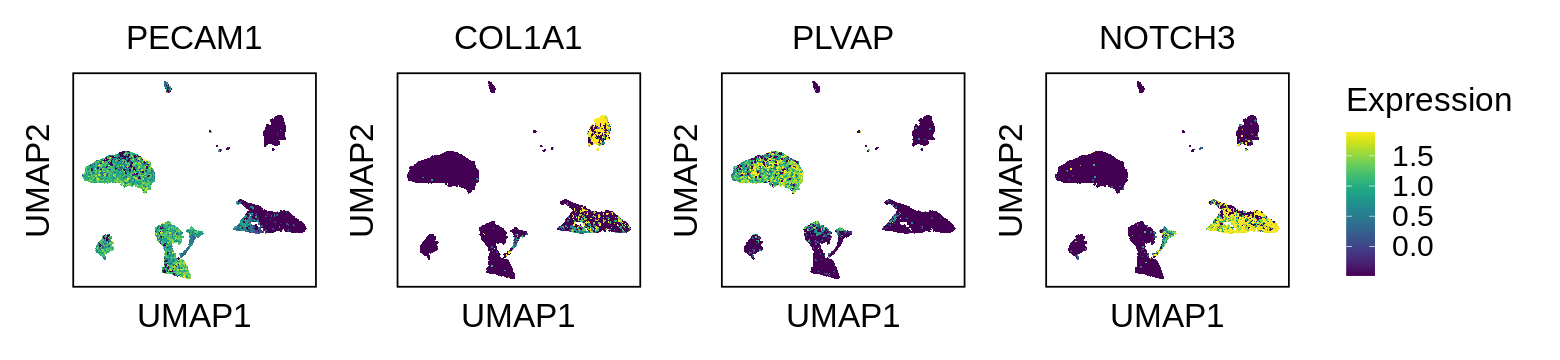

In [12]:
height = 3
width = 13
fig.size(height, width)

outplot = p1 + p2 + p3 + p4 + umap_legend + plot_layout(nrow = 1)
outplot

ggsave(paste0(figdir, 'intl_umap_markers.png'), plot = outplot,  
       height = height, width = width, dpi = 500)
ggsave(paste0(figdir, 'intl_umap_markers.pdf'), plot = outplot,  
       height = height, width = width, dpi = 500, device = cairo_pdf)

In [ ]:
sc_de <- wilcoxauc(intl_norm[, intl_meta %>% filter(dataset == "scRNAseq") %>% pull(cell)], intl_meta %>% filter(dataset == "scRNAseq") %>% pull(hres.0.4)) 
sn_de <- wilcoxauc(intl_norm[, intl_meta %>% filter(dataset == "snRNAseq") %>% pull(cell)], intl_meta %>% filter(dataset == "snRNAseq") %>% pull(hres.0.4))

In [ ]:
sc_de %>% filter(group == 8, feature %in% extract_broad_genes("VSM/P")) %>% arrange(desc(logFC))

In [ ]:
sc_de %>% filter(group == 8, feature %in% extract_broad_genes("EC")) %>% arrange(desc(logFC))

In [ ]:
cluster_center <- intl_meta %>%
                  group_by(hres.0.4) %>%
                  summarise_at(vars(huwotUMAP1, huwotUMAP2), funs(median(., na.rm=TRUE)))
cluster_center <- as.data.frame(cluster_center)

In [ ]:
fig.size(10, 12)
plot_shuffled_features(intl_meta, 
                       norm, 
                       "PLVAP", pct = 0.95) 

BTNL9, ADAMTS6, PALMD, AQP1, TM4SF1, 
0 - EC (AVR)
1 - VSM/P
2 - EC 
3 - FIB
4 - EC (GC)
5 - scublet_high
6 - EC (lymphatic)

In [ ]:
#BTNL9, ADAMTS6, PALMD, AQP1, TM4SF1, 
fig.size(8, 8)

plot_dist <- function(input_df, norm, feature)  {
    plot_df <- input_df %>% mutate(Exp = norm[feature, input_df$cell])
    p <- ggplot(plot_df, aes(x = hres.0.4, y = Exp, fill = dataset)) + 
            geom_violin(scale = "width") + 
            theme_classic(base_size = 20) + 
            labs(x = "Cluster", y = "Normalized Expression", title = feature) +
            theme(plot.title = element_text(size = 25, face = "bold.italic", hjust = 0.5))
    return(p)
}
#CEACAM1, DNASE1L3, PLVAP, GPM6A, EDIL3, TLL1, ZNF385D, NR2F2
#PITPNC1, GRB10, SLCO2A1, RAPGEF4
#NOTCH3, PDGFRB, ITGA8
#NTRK3, CCDC102B, RGS5, ABCC9, ADCY3, ADGRB3
#PIP5K1B, ROBO1, PIEZO2, DAAM2, PHTF2, GATA3, POSTN
#MCTP1, SLC14A1, ENPP2, LYPD6B
#BTNL9, ADAMTS6, PALMD, AQP1, TM4SF1, VEGFC, CCDC3, CDH5, SERPINE2, FBLN5, CXCL12, SOX17
#CEACAM1, DNASE1L3, PLVAP, PITPNC1, GRB10, SLCO2A1, RAPGEF4
#plot_dist(intl_meta, norm, "CEACAM1")
#plot_dist(intl_meta, norm, "DNASE1L3")
#plot_dist(intl_meta, norm, "PLVAP")
plot_dist(intl_meta, norm, "CEACAM1")
plot_dist(intl_meta, norm, "DNASE1L3")
plot_dist(intl_meta, norm, "PLVAP")
plot_dist(intl_meta, norm, "GRB10")
plot_dist(intl_meta, norm, "SLCO2A1")
plot_dist(intl_meta, norm, "RAPGEF4")

In [ ]:
plot_dist(intl_meta, norm, "CENPF")
plot_dist(intl_meta, norm, "EZH2")
plot_dist(intl_meta, norm, "APOLD1")

In [ ]:
write.csv(intl_de %>% rename(cluster = group), 
          '/data/srlab/ssg34/SLE_kidney_v2/data/tissue/intl_de_wilcox_sc_sn_07242023.csv',
          row.names = FALSE, quote = FALSE)

In [ ]:
ggplot(intl_meta, 
       aes(x = as.factor(hres.0.4), y = as.numeric(doublet_score), fill = dataset)) + 
    geom_boxplot() + theme_classic(base_size = 20) + 
    labs(x = "cluster", y = "scrublet_score")




ggplot(intl_meta, 
       aes(x = as.factor(hres.0.4), y = log(as.numeric(nCount_RNA)), fill = dataset)) + 
    geom_boxplot() + theme_classic(base_size = 20) +
    labs(x = "cluster", y = "log(Counts Per Cell)")




ggplot(intl_meta,
       aes(x = as.factor(hres.0.4), y = log(as.numeric(nFeature_RNA)), fill = dataset)) + 
    geom_boxplot() + theme_classic(base_size = 20) + 
    labs(x = "cluster", y = "log(Genes Per Cell)")

### Gene Heatmaps

In [14]:
marker.genes <- c("PECAM1", "PLVAP", "PTPRB", "FLT1", "CEACAM1", 
           "TLL1", "GPM6A",
           "MCAM", "NTRK3", "RGS5",
           "DCN", "COL1A2", "COL1A1",
           "LYPD6B", "ENPP2", "MCTP1",
           "ADAMTS6", "BTNL9", "CXCL12",
           'EMCN', 'HECW2', 'EHD3',
           'POSTN', "GATA3", "DAAM2", 
           "NOTCH3", "PDGFRB", 
           "MMRN1", "PROX1", "TBX1")

annotation.order = c("INTL0. Fenestrated EC",
                  "INTL1. EC-AVR",
                  "INTL2. VSMC/P",
                  "INTL3. FIB",
                  "INTL4. EC-DVR",
                  "INTL5. EC-AEA",
                  "INTL6. EC-GLOM",
                  "INTL7. Mesangial",
                  "INTL8. EC/VSMC-P",
                  "INTL9. EC-LYMPH")

In [15]:
marker_genes = marker.genes

In [13]:
wilcox_sn <- wilcoxauc(qcd_norm[, qcd_meta %>% filter(dataset == 'snRNAseq') %>% pull(cell)], 
                       qcd_meta %>% filter(dataset == 'snRNAseq') %>% pull(final_annotation))
wilcox_sc <- wilcoxauc(qcd_norm[, qcd_meta %>% filter(dataset == 'scRNAseq') %>% pull(cell)], 
                       qcd_meta %>% filter(dataset == 'scRNAseq') %>% pull(final_annotation))

In [16]:
sc_plot_df <- wilcox_sc %>%  filter(feature %in% marker_genes) %>% 
                    select(group, feature, 
                           logFC, avgExpr, pct_in) %>% ungroup() %>% group_by(feature) %>% 
                    mutate(avgExpr_scaled = scale(avgExpr)) 
sn_plot_df <- wilcox_sn %>%  filter(feature %in% marker_genes) %>% 
                    select(group, feature, 
                           logFC, avgExpr, pct_in) %>% ungroup() %>% group_by(feature) %>% 
                    mutate(avgExpr_scaled = scale(avgExpr)) 

In [17]:
setdiff(sc_plot_df$group, annotation.order)

character(0)

In [18]:
title = 'scRNA-seq'
dat_all = sc_plot_df %>% rename(percent = pct_in, zscore = avgExpr_scaled) 

dat = dat_all %>% pivot_wider(id_cols = 'feature', names_from = 'group', 
                    values_from = 'zscore') %>% as.data.frame
rownames(dat) = dat$feature
dat = dat %>% select(-feature)
row.order = marker_genes
col.order = annotation.order
# row.order = rownames(dat)[hclust(dist(dat))$order]
# col.order = colnames(dat)[hclust(dist(t(dat)))$order]
dat = dat_all
dat$group = factor(dat$group, levels = col.order)
dat$feature = factor(dat$feature, levels = row.order)

# dat = dat[!is.na(dat$group), ]

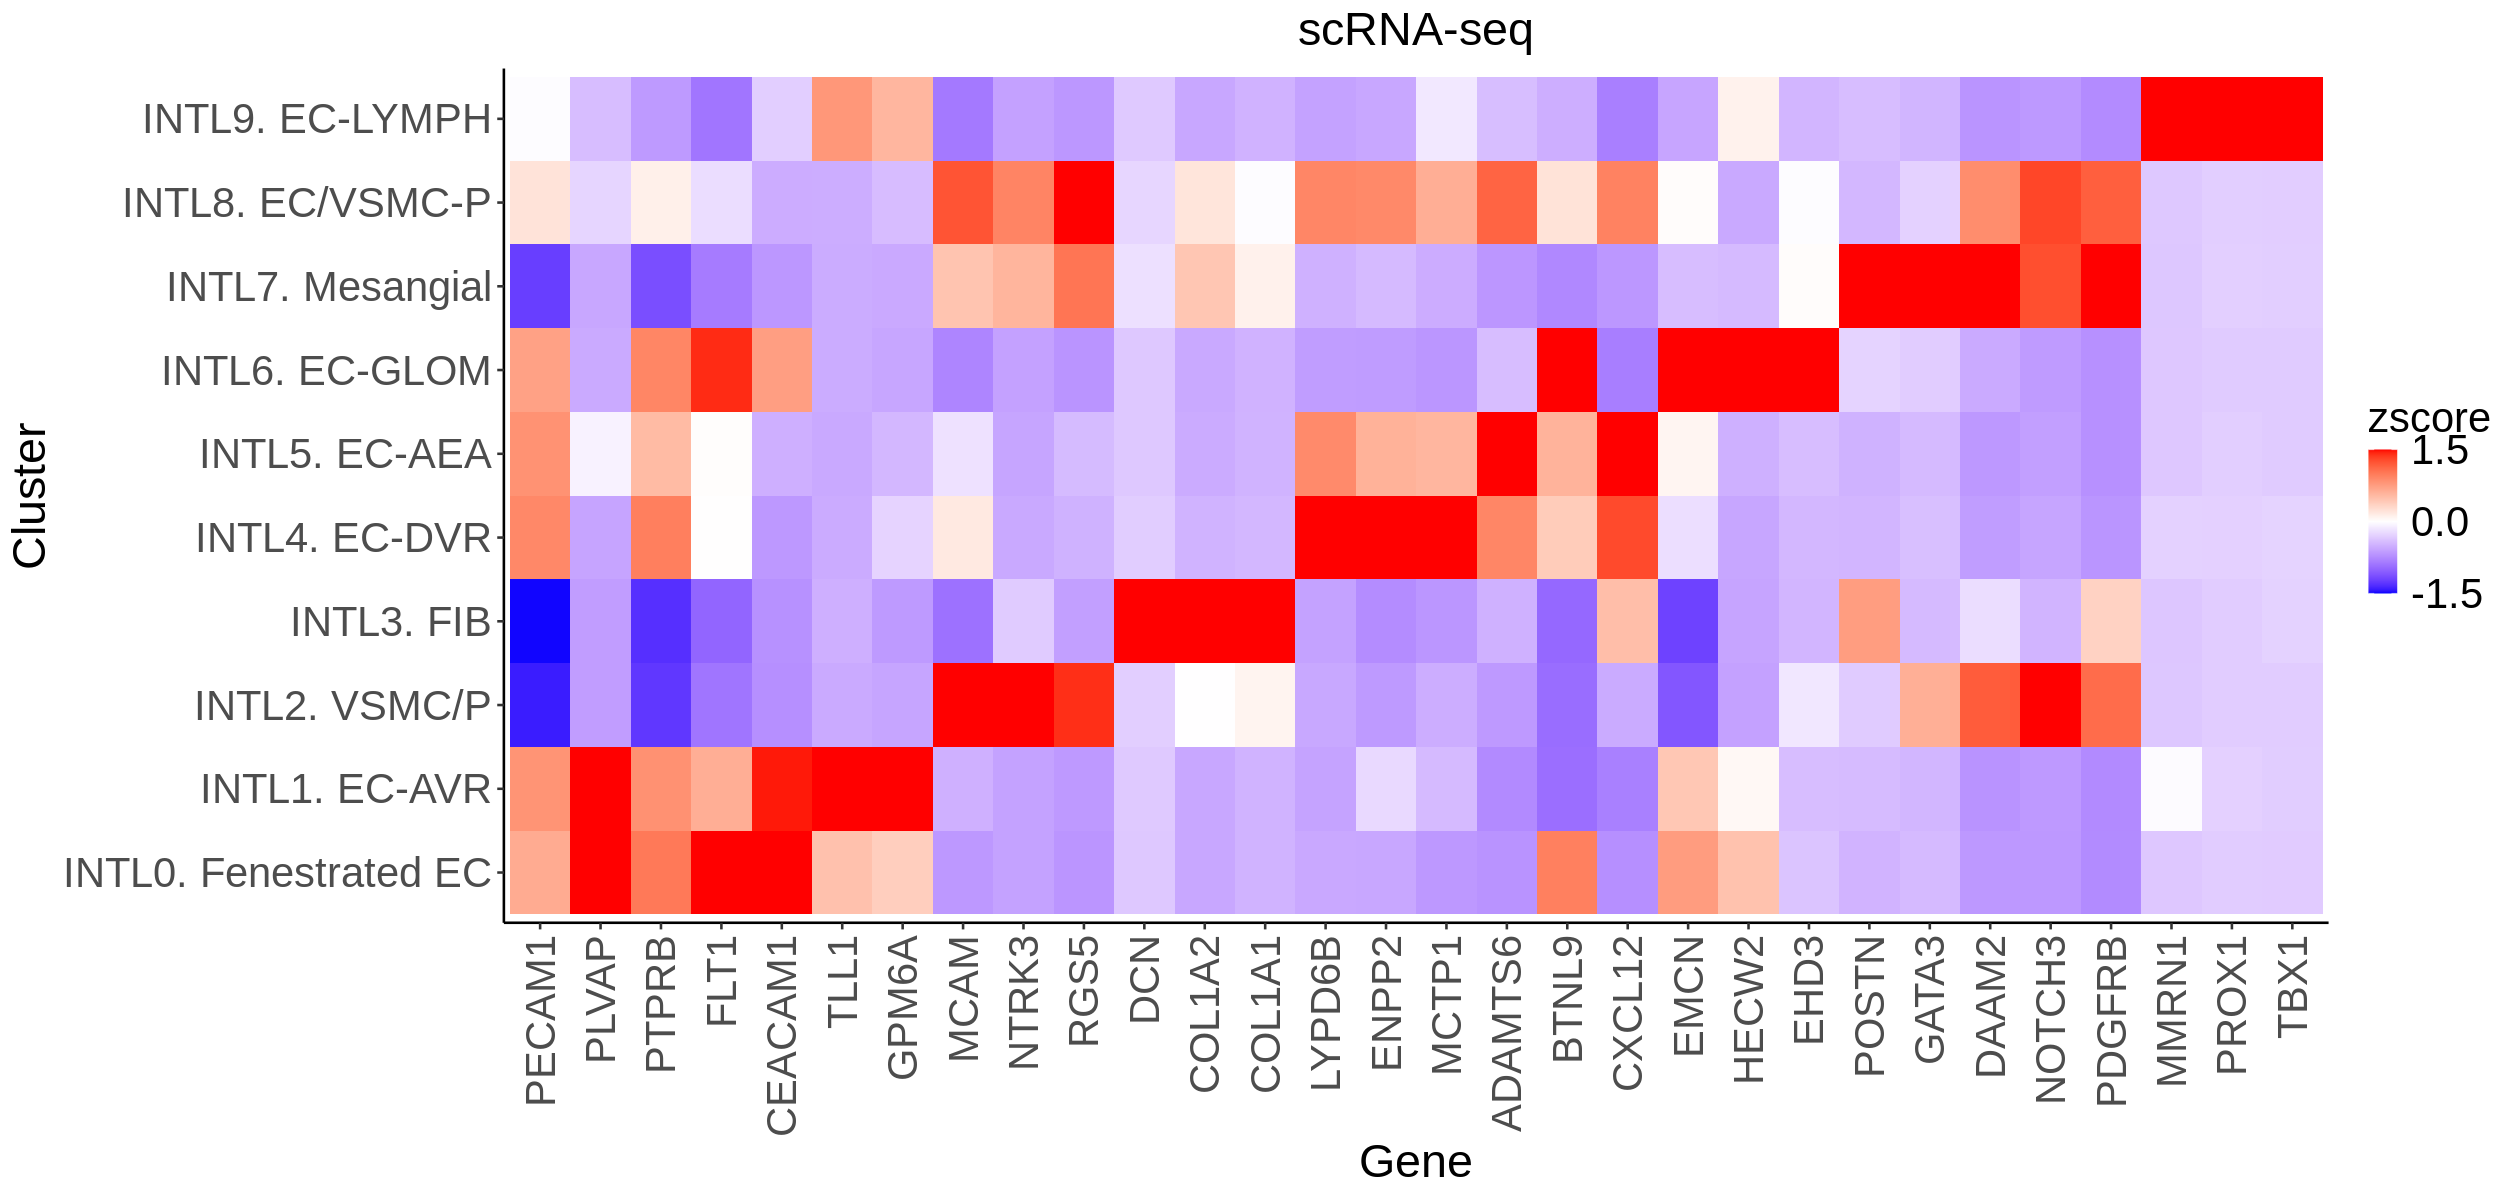

In [19]:
height = 10
width = 21
fig.size(height, width)


marker_heatmap = ggplot(dat, 
               aes(x = feature, y = group, 
                   fill = zscore)) + 
    geom_tile() + 
    theme_classic(base_size = tickfontsize) + 
    scale_fill_gradient2(low = "blue",
                         mid = "white",
                         high= "red", 
                         limits=c(-1.5, 1.5), 
                         oob = scales::squish, breaks = c(-1.5, 0, 1.5)) + 
    # scale_x_discrete(limits = marker_genes) + 
    # scale_y_discrete(limits = final_annotation$final_annotation) + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = .5),
          axis.text = element_text( size = labelfontsize+5),
          axis.title = element_text(size = labelfontsize+8), 
          plot.title = element_text(size = labelfontsize+8, hjust = 0.5), 
          legend.text = element_text(size = labelfontsize+5),
          legend.title = element_text(size = labelfontsize+5)

         ) + 
    labs(x = "Gene", y = "Cluster", title = title)

outplot = marker_heatmap
outplot

ggsave(paste0(figdir, 'intl_sc_heatmap_markers.png'), plot = outplot,  
       height = height, width = width, dpi = 500)
ggsave(paste0(figdir, 'intl_sc_heatmap_markers.pdf'), plot = outplot,  
       height = height, width = width, dpi = 500, device = cairo_pdf)

In [20]:
title = 'snRNA-seq'
dat_all = sn_plot_df %>% rename(percent = pct_in, zscore = avgExpr_scaled) 

# dat = dat_all %>% pivot_wider(id_cols = 'feature', names_from = 'group', 
#                     values_from = 'zscore') %>% as.data.frame
# rownames(dat) = dat$feature
# dat = dat %>% select(-feature)
# row.order = rownames(dat)[hclust(dist(dat))$order]
# col.order = colnames(dat)[hclust(dist(t(dat)))$order]
dat = dat_all
dat$group = factor(dat$group, levels = col.order)
dat$feature = factor(dat$feature, levels = row.order)
# dat = dat[!is.na(dat$group), ]

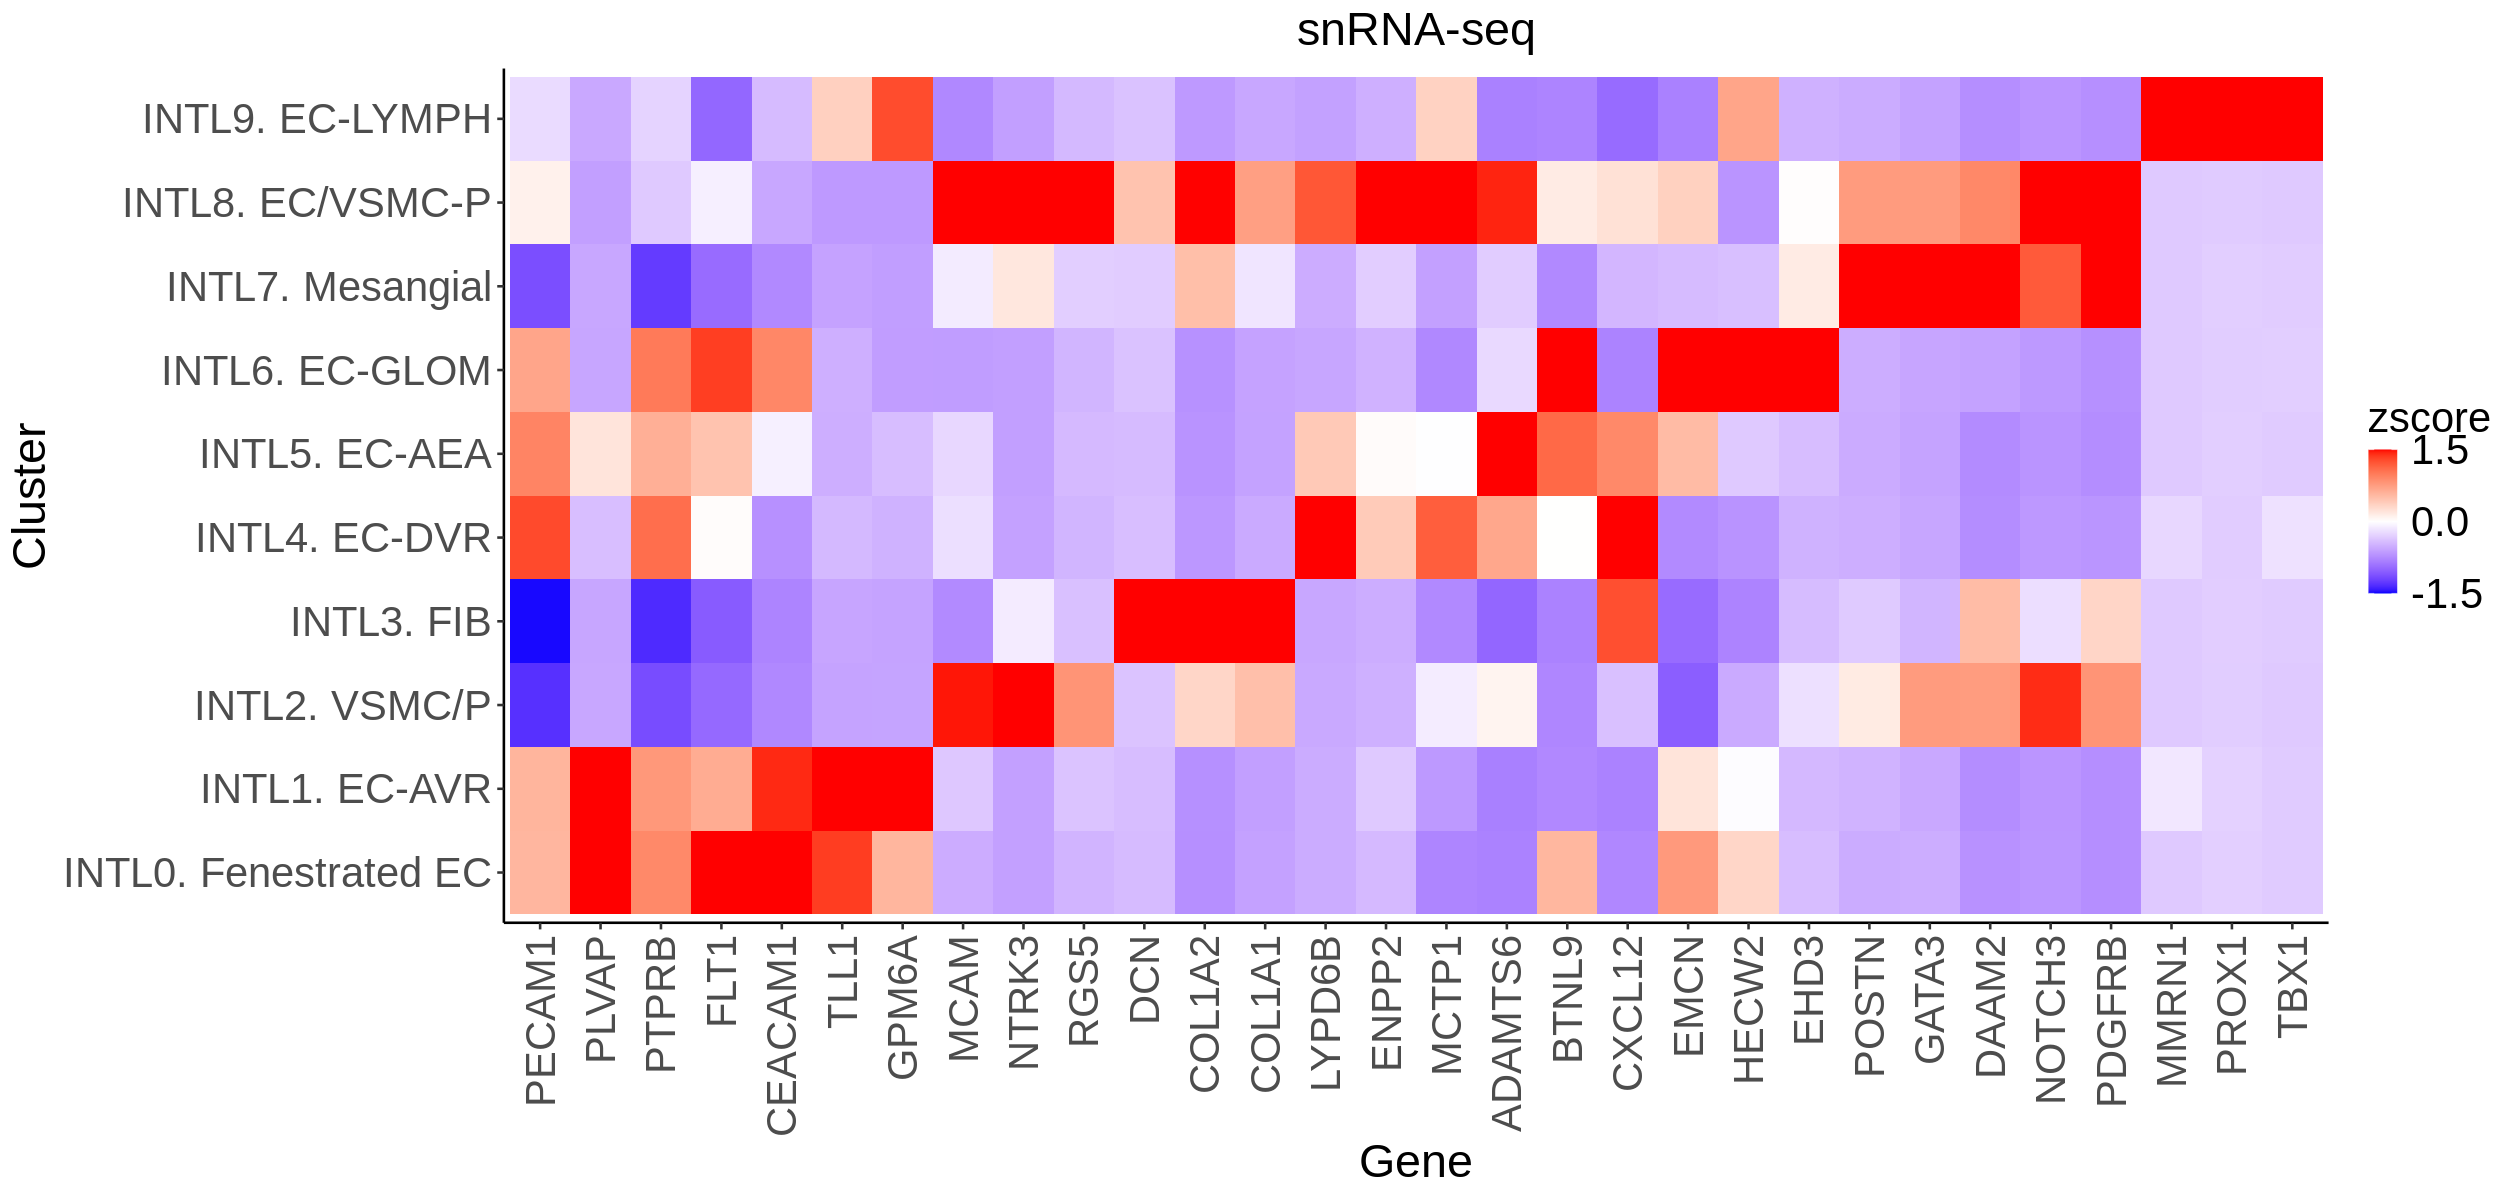

In [21]:
height = 10
width = 21
fig.size(height, width)


marker_heatmap = ggplot(dat, 
               aes(x = feature, y = group, 
                   fill = zscore)) + 
    geom_tile() + 
    theme_classic(base_size = tickfontsize) + 
    scale_fill_gradient2(low = "blue",
                         mid = "white",
                         high= "red", 
                         limits=c(-1.5, 1.5), 
                         oob = scales::squish, breaks = c(-1.5, 0, 1.5)) + 
    # scale_x_discrete(limits = marker_genes) + 
    # scale_y_discrete(limits = final_annotation$final_annotation) + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = .5),
          axis.text = element_text( size = labelfontsize+5),
          axis.title = element_text(size = labelfontsize+8), 
          plot.title = element_text(size = labelfontsize+8, hjust = 0.5), 
          legend.text = element_text(size = labelfontsize+5),
          legend.title = element_text(size = labelfontsize+5)

         ) + 
    labs(x = "Gene", y = "Cluster", title = title)

outplot = marker_heatmap
outplot

ggsave(paste0(figdir, 'intl_sn_heatmap_markers.png'), plot = outplot,  
       height = height, width = width, dpi = 500)
ggsave(paste0(figdir, 'intl_sn_heatmap_markers.pdf'), plot = outplot,  
       height = height, width = width, dpi = 500, device = cairo_pdf)

### Cluster Proportions in Matched Patients

In [22]:
intl_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/tissue/intl_meta_qcd_harmony_umap_clusternames_11302023.rds')
intl_meta <- intl_meta  %>% 
                mutate(hres.0.4 = factor(hres.0.4, levels = as.character(0:9))) %>% 
                mutate(individual = str_split(sample, '_')) %>% 
                rowwise() %>% 
                mutate(individual = unlist(individual)[3]) 

sample_freq <- intl_meta %>% select(dataset, individual, hres.0.4) %>% 
                    table() %>% data.frame() %>% 
                    pivot_wider(names_from = "hres.0.4", values_from = Freq) 

ind_list <- intl_meta %>% select(dataset, individual) %>% 
                table() %>% data.frame() %>% 
                pivot_wider(names_from = 'dataset', values_from = "Freq") %>% filter(scRNAseq > 100 & snRNAseq > 100) %>% 
                pull(individual)

sample_freq_sc <- sample_freq %>% 
                    filter(individual %in% ind_list) %>% 
                    select(- individual) %>% 
                    filter(dataset == "scRNAseq") %>% 
                    select(-dataset) %>% colSums()

sample_freq_sn <- sample_freq %>% 
                    filter(individual %in% ind_list) %>% 
                    select(- individual) %>% 
                    filter(dataset == "snRNAseq") %>% 
                    select(-dataset) %>% colSums()
sample_freq <- data.frame(rep("a", 10))
sample_freq$sc_freq <- sample_freq_sc / sum(sample_freq_sc)
sample_freq$sc_se <- sqrt((sample_freq$sc_freq * (1 - sample_freq$sc_freq)) / sample_freq_sc)
sample_freq$sn_freq <- sample_freq_sn / sum(sample_freq_sn)
sample_freq$sn_se <- sqrt((sample_freq$sn_freq * (1 - sample_freq$sn_freq)) / sample_freq_sn)
sample_freq <- sample_freq[,- 1]
sample_freq$hres.0.4 <- as.character(seq(0, 9))

In [23]:
length(ind_list)

[1] 25

In [24]:
r = cor(sample_freq$sc_freq, sample_freq$sn_freq)
pval = cor.test(sample_freq$sc_freq, sample_freq$sn_freq)$p.value

In [25]:
format(pval, format = 'e', digits = 3)

[1] "0.0666"

In [26]:
title = 'Interstitial/Stromal'

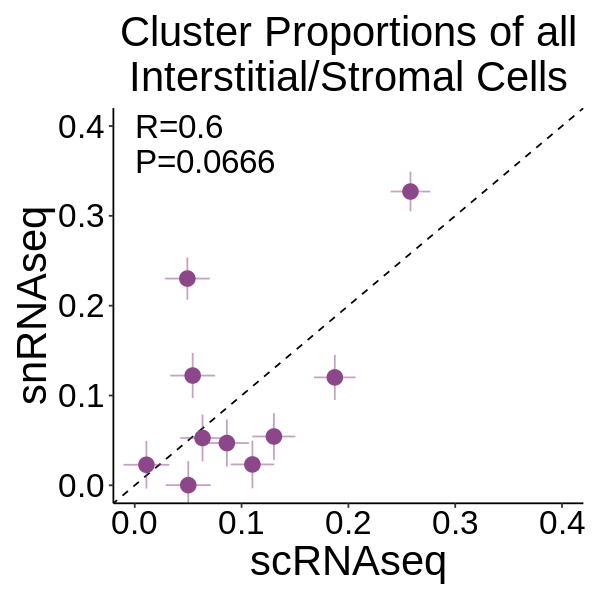

In [29]:
max_val <- max(sample_freq[, c("sc_freq", "sn_freq")])

p = ggplot(sample_freq, aes(x = sc_freq, y = sn_freq)) + 
    geom_abline(linetype = "dashed") +
    # scale_color_manual(values =as.vector(rev(palette36.colors(26)))) +
    theme_classic() + 
    geom_linerange(aes(ymax = sn_freq+1.96*sn_se, 
                        ymin = sn_freq-1.96*sn_se), alpha = 0.5, color = 'orchid4') +
    geom_linerange(aes(xmax = sc_freq+1.96*sc_se, 
                        xmin = sc_freq-1.96*sc_se), alpha = 0.5, color = 'orchid4') +
    geom_point(size = 4, color = 'orchid4') + 
    theme(legend.position = "none",
          axis.text = element_text(size = 15),
          axis.title = element_text(size = 18)) +
    coord_cartesian(xlim = c(0, 0.4), ylim = c(0, 0.4)) + 
    labs(x = "scRNAseq",
         y = "snRNAseq", title = paste0('Cluster Proportions of all\n', title, ' Cells'))+
    annotate("text", x = 0, y = 0.4, label = paste0('R=', round(r, 2)), hjust =0, 
         size =7)+
    annotate("text", x = 0, y = 0.36, label = paste0('P=', 
             format(pval, format = 'e', digits = 3)), hjust =0, 
         size =7)

p = p +theme(axis.text = element_text(color = "black", size = labelfontsize, vjust = 0.5),
           axis.title = element_text(size=labelfontsize+5, hjust = 0.5),
            legend.text = element_text(size = labelfontsize),
            legend.title = element_text(size = labelfontsize),
                plot.title = element_text(hjust = 0.5, size = labelfontsize+5),
                theme(text=element_text(family="Arial")),
                                    plot.margin = margin(10, 10, 10, 10))
height = 5
width = 5
fig.size(height, width)

outplot = p
outplot

ggsave(paste0(figdir, 'intl_scsn_cellfreqcorr.png'), plot = outplot,  
       height = height, width = width, dpi = 500)
ggsave(paste0(figdir, 'intl_scsn_cellfreqcorr.pdf'), plot = outplot,  
       height = height, width = width, dpi = 500, device = cairo_pdf)

In [30]:
cor.test(sample_freq$sc_freq, sample_freq$sn_freq)


	Pearson's product-moment correlation

data:  sample_freq$sc_freq and sample_freq$sn_freq
t = 2.122, df = 8, p-value = 0.06662
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.04742347  0.89251076
sample estimates:
      cor 
0.6001219 
